### Aykırı Gözlem Analizi

#### Aykırı Değeri Yakalamak

In [2]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64','int64']) #Verideki sayısal değerleri istedik.
df = df.dropna() #Verideki eksik değerleri sildik.
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df_table = df["table"] #Değişken bazlı inceledik

In [4]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

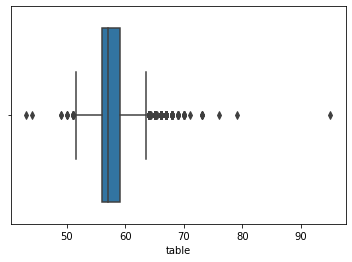

In [9]:
sns.boxplot(x = df_table); #boxplot yardımıyla gördük

In [10]:
Q1 = df_table.quantile(0.25) #Çeyreklik değerlerini bulup bunlar yardımıyla alt ve üst sınır belirledik.
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1 

In [11]:
Q1

56.0

In [12]:
Q3

59.0

In [13]:
IQR

3.0

In [14]:
alt_sinir = Q1 - 1.5*IQR
ust_sınır = Q3 + 1.05*IQR

In [15]:
alt_sinir

51.5

In [17]:
ust_sınır

62.15

In [19]:
((df_table < alt_sinir) | (df_table > ust_sınır)) #alt sınırdan küçük veya büyük olanları bulup alt satırlarda indeksini aldık.

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [20]:
aykiri_tf = (df_table < alt_sinir)

In [21]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [22]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [29]:
df_table[aykiri_tf].index

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

In [24]:
aykiri_tf1 = (df_table > ust_sınır)

In [25]:
aykiri_tf1.head()

0    False
1    False
2     True
3    False
4    False
Name: table, dtype: bool

In [27]:
df_table[aykiri_tf1].index

Int64Index([    2,    43,    91,   122,   145,   200,   218,   219,   227,
              239,
            ...
            53695, 53697, 53756, 53757, 53758, 53785, 53825, 53828, 53840,
            53897],
           dtype='int64', length=1195)

### Aykırı Değer Problemini Çözmek

#### SİLME

In [30]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [31]:
import pandas as pd

In [32]:
type(df_table)

pandas.core.series.Series

In [33]:
df_table = pd.DataFrame(df_table)

In [35]:
df_table.shape

(53940, 1)

In [38]:
temiz_df = df_table[~ ((df_table < (alt_sinir)) |(df_table > (ust_sınır))).any(axis = 1)] #aradaki ~ ifadesi sağ taraftaki ifade dışında kalanları al demeye geliyor. aykırılar dışındakini getir. any axis 1 de sütun bazlı olacağı için

In [40]:
temiz_df.shape

(52729, 1)

### Ortalama İle Doldurma

In [41]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64','int64']) #Verideki sayısal değerleri istedik.
df = df.dropna() #Verideki eksik değerleri sildik.
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [42]:
df_table = df["table"] #Değişken bazlı inceledik

In [43]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [44]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [47]:
df_table.mean() 


57.45718390804603

In [50]:
df_table[aykiri_tf] =df_table.mean() #Aykırı değerleri tüm gözlemlerin ortalamasıyla doldurduk

<ipython-input-50-7ca0e459afb6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf] =df_table.mean() #Aykırı değerleri tüm gözlemlerin ortalamasıyla doldurduk


In [51]:
df_table[aykiri_tf]

1515     57.459506
3238     57.459506
3979     57.459506
4150     57.459506
5979     57.459506
7418     57.459506
8853     57.459506
11368    57.459506
22701    57.459506
25179    57.459506
26387    57.459506
33586    57.459506
35633    57.459506
45798    57.459506
46040    57.459506
47630    57.459506
Name: table, dtype: float64

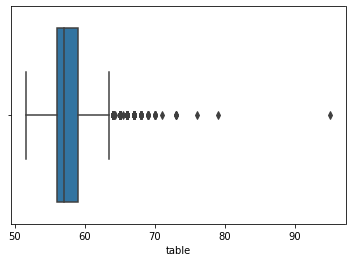

In [56]:
sns.boxplot(x = df_table); #Görüldüğü gibi alt sınırdaki aykırılıklar gitti

### Baskılama yöntemi

In [57]:
#Aykırılar yakalandıktan sonra üst taraftaysa üst sınıra alt taraftaysa alt sınıra dönüştürülür.

In [58]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64','int64']) #Verideki sayısal değerleri istedik.
df = df.dropna() #Verideki eksik değerleri sildik.
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [59]:
df_table = df["table"] #Değişken bazlı inceledik

In [60]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [61]:
df_table[aykiri_tf] = alt_sinir

<ipython-input-61-e2f0da25fd88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf] = alt_sinir


In [63]:
aykiri_tf1 = (df_table > ust_sınır)

In [65]:
df_table[aykiri_tf1]

2        65.0
43       63.0
91       69.0
122      63.0
145      64.0
         ... 
53785    65.0
53825    63.0
53828    63.0
53840    63.0
53897    63.0
Name: table, Length: 1195, dtype: float64

In [66]:
ust_sınır

62.15

In [67]:
df_table[aykiri_tf1] = ust_sınır

<ipython-input-67-ad1e63b1f63c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf1] = ust_sınır


<AxesSubplot:xlabel='table'>

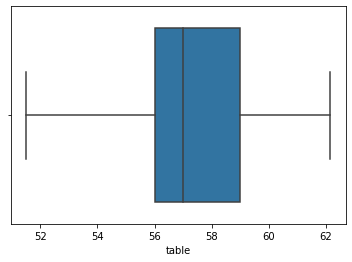

In [69]:
sns.boxplot(x = df_table) # Eksik gözlem komple giderildi

### Çok Değişkenli Aykırı Gözlem Analizi

##### Local Outlier Factor

In [70]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64','int64']) #Verideki sayısal değerleri istedik.
df = df.dropna() #Verideki eksik değerleri sildik.
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [71]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [72]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination  = 0.1)

In [73]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [74]:
df_scores = clf.negative_outlier_factor_

In [77]:
df_scores[0:10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [81]:
np.sort(df_scores)[0:20] #en hızlı azalışın olduğu yeri belirlersek mantıklı olur.

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

In [82]:
esik_deger = np.sort(df_scores)[13]

In [83]:
aykiri_tf = df_scores > esik_deger

In [84]:
aykiri_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [85]:
yeni_df = df[df_scores > esik_deger]

In [86]:
yeni_df #aykırılar silindi

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [87]:
df[df_scores < esik_deger] # Aykırı degerler

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


### Baskılama

In [91]:
baski_deger = df[df_scores == esik_deger]

In [93]:
aykirilar = df[~aykiri_tf] #aykırıları  aykırılar adlı değişkene atadık

In [94]:
res = aykirilar.to_records(index = False) #indekslerden kurtulduk ve to_recordsla arraya çevirdik

In [95]:
res[:] = baski_deger.to_records(index = False) # Tüm aykırılara baskı degeri atandı

In [97]:
res

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [98]:
import pandas as pd
df[~ aykiri_tf] = pd.DataFrame(res, index = df[~ aykiri_tf].index)

In [102]:
df[~ aykiri_tf] #Atanmış oldu.

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
31230,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19
